In [1]:
from datascience import *
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Data clarification
#Rank - Current World ranking based on 4 last competitions
#Name - Name of the participant
#Country - Country of origin of participant
#Age - Age of participant
#Average Arrow - Average lifetime competitive arrow score, reference: http://texasarchery.info/wp-content/uploads/2015/08/NASP-JOAD-How-to-score.jpg
base = pd.read_csv('Cleaned Data Men age and avg arrow.csv')
base = base.drop(columns=['Country'])
base

,World Rank,Name,Score,Age,Average Arrow
0,1,STEVE WIJLER,270.500,22,9.28
1,2,LEE WOO SEOK,267.750,21,9.44
2,3,KIM WOOJIN,256.500,26,9.47
3,4,MAURO NESPOLI,218.250,30,9.30
4,5,IM DONG HYUN,208.000,32,9.42
5,6,METE GAZOZ,197.500,19,9.27
6,7,BRADY ELLISON,177.750,29,9.29
7,8,WEI CHUN-HENG,170.500,24,9.26
8,9,THOMAS CHIRAULT,166.750,21,9.18
9,10,TAYLOR WORTH,148.500,27,9.28


In [3]:
#quick mean age calculation for paper
base['Age'].mean()

24.62

In [4]:
BaseByAge = base.sort_values(by=['Age'],ascending= False)

In [5]:
#Calculate how many arhers of each age there are
#Would like to show if there is a strong preference for certain ages
AgeAmount = base.groupby('Age',as_index = False).count()
#list(AgeAmount)
AgeAmount

,Age,World Rank,Name,Score,Average Arrow
0,17,2,2,2,2
1,18,4,4,4,4
2,19,6,6,6,6
3,20,6,6,6,6
4,21,9,9,9,9
5,22,13,13,13,13
6,23,9,9,9,9
7,24,7,7,7,7
8,25,8,8,8,8
9,26,6,6,6,6


In [6]:
#Time to clean the data after some unexpected results
CleanedAgeA = AgeAmount.drop(columns=['Name','Score','Average Arrow'])
CleanedAgeA = CleanedAgeA.rename(columns={'World Rank': '# of Archers'})

In [7]:
#Goal here was to keep the original cleaned data set,unfortunately this did not work, but is fixed later
CleanedAgeAB = CleanedAgeA
CleanedAgeAB['cum_sum'] = CleanedAgeA['# of Archers'].cumsum()
CleanedAgeAB['Cumulative %'] = 100*CleanedAgeA.cum_sum/CleanedAgeA['# of Archers'].sum()
CleanedAgeAB
#I Realize now that calculating the percentage was entirely pointless
# as our data has 100 points, therefore the cumulative sum is the same as the
#percentage

,Age,# of Archers,cum_sum,Cumulative %
0,17,2,2,2.0
1,18,4,6,6.0
2,19,6,12,12.0
3,20,6,18,18.0
4,21,9,27,27.0
5,22,13,40,40.0
6,23,9,49,49.0
7,24,7,56,56.0
8,25,8,64,64.0
9,26,6,70,70.0


In [8]:
df1 = CleanedAgeAB.drop(columns=['cum_sum',"# of Archers"])
df2 = CleanedAgeAB.drop(columns=['cum_sum',"Cumulative %"])

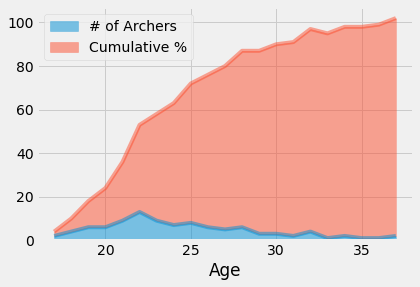

In [9]:
#Goal: Make a chart showcasing most archers are very young
CleanedAgeAB.plot.area(x = 'Age', y = ["# of Archers",'Cumulative %'],alpha = 0.5)


Text(0,0.5,'# of Archers')

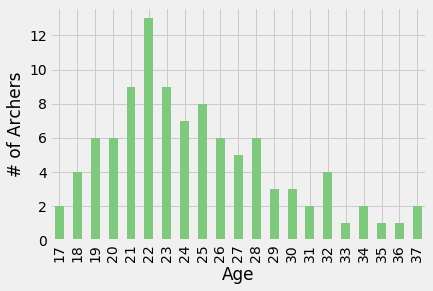

In [10]:
#Goal: make a graph representing the presence of each age in the dataset
#CleanedAgeA = CleanedAgeA.drop(columns = ['cum_sum','Cumulative %'])
ax = CleanedAgeA.plot.bar(x = 'Age',y = '# of Archers',legend = False,colormap = 'Accent')
ax.set_ylabel("# of Archers")
#The following data could probably be grouped into age brackets to produce a cleaner graph, but this one is more accurate

In [11]:
#Question 2 Graphs begin here
#Goal: Produce a graph showing performance for archers aged under 25 and 25 and over
#1st, seperate the data by age groups
ElderData = BaseByAge.iloc[0:44]
YoungData = BaseByAge.iloc[44:100]


In [12]:
#Find the means of desired variables
df1 = ElderData.mean()
df2 = YoungData.mean()
CombinedMeans = pd.concat([df1,df2], axis = 1)
CombinedMeans.columns = ['Older','Younger']
CombinedMeans

,Older,Younger
World Rank,50.272727,50.642857
Score,86.395773,81.066964
Age,28.909091,21.250000
Average Arrow,9.083636,9.074643


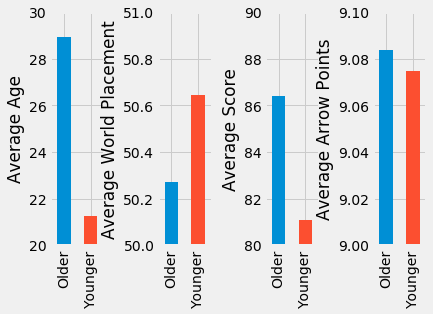

In [13]:
#Creating a small multiple figure in order to show difference in performance
#of younger and older archers
fig, axs = plt.subplots(1,4)
row1 = CombinedMeans.iloc[0]
row2 = CombinedMeans.iloc[1]
row3 = CombinedMeans.iloc[2]
row4 = CombinedMeans.iloc[3]
fig.subplots_adjust(wspace = 1)
axs[1].set_ylim(50,51)
axs[1].set_ylabel('Average World Placement')
axs[2].set_ylim(80,90)
axs[2].set_ylabel('Average Score')
axs[0].set_ylim(20,30)
axs[0].set_ylabel('Average Age')
axs[3].set_ylim(9,9.1)
axs[3].set_ylabel('Average Arrow Points')
row1.plot.bar(ax = axs[1])
row2.plot.bar(ax = axs[2])
row3.plot.bar(ax = axs[0])
row4.plot.bar(ax = axs[3])

In [14]:
#Question 3: Since Recurrent shoulder pains are more prevalent in
#archers aged 20 and up, can this be observed in their performance or sport retirement age?
#Question 4: Since there seem to be many factors such as stress, anxiety, probability of injury, and heart rate control that can influence the performance of an archer, is there a formula for the "perfect" archer?
#Question 5: If the above question is true, can these trends be noticed in the world of professional archery today?

In [15]:
#Goal: Compile a data set comparing the performance of archers younger than 20, and archers older than 20,but younger than 23 in order to minimize the effect of longer training  by older archers
#We should end up with data about archers ages 17-19 and 20-23
#print(BaseByAge.iloc[51:88])
injuryYoung = BaseByAge.iloc[88:100]
injuryOld = BaseByAge.iloc[51:88]

In [16]:
#Since we are evaluating performance based on age again, we can do the same calculations as we did before
df1 = injuryYoung.mean()
df2 = injuryOld.mean()
CombinedMeans = pd.concat([df1,df2], axis = 1)
CombinedMeans.columns = ['Younger','Older']
CombinedMeans

,Younger,Older
World Rank,57.916667,46.675676
Score,73.885417,85.012162
Age,18.333333,21.675676
Average Arrow,9.088333,9.075946


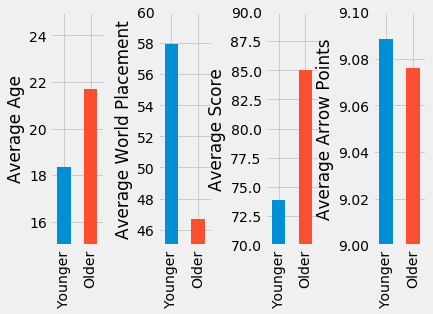

In [17]:
#This data does not support the conclusion of the research paper
#plausible causes: more training could mean easily overcoming any disadvantages the pain could cause
#Archers who feel chronic pain do not perform as well and do not compete at the highest levels,
#meaning they are not represented in our dataset
#without access to medical records, we cannot establish if some archers stop due to shoulder pain, making us unable
#to associate pain with retirement age
fig, axs = plt.subplots(1,4)
row1 = CombinedMeans.iloc[0]
row2 = CombinedMeans.iloc[1]
row3 = CombinedMeans.iloc[2]
row4 = CombinedMeans.iloc[3]
fig.subplots_adjust(wspace = 1)
axs[1].set_ylim(45,60)
axs[1].set_ylabel('Average World Placement')
axs[2].set_ylim(70,90)
axs[2].set_ylabel('Average Score')
axs[0].set_ylim(15,25)
axs[0].set_ylabel('Average Age')
axs[3].set_ylim(9,9.1)
axs[3].set_ylabel('Average Arrow Points')
row1.plot.bar(ax = axs[1])
row2.plot.bar(ax = axs[2])
row3.plot.bar(ax = axs[0])
row4.plot.bar(ax = axs[3])

In [18]:
#Based on the articles,Let us summarize what each found to be the best age for an archer
#Article 1: an archer of age under 35
#Article 2: an archer of age over 25
#Article 3: an archer of age under 20 - although this data does not agree with our research so far
#Article 4: an archer of around the age of late 20's/early 30's but younger than 50
#Article 5: an archer of around the age of late 20's/early 30's but younger than 50
#This leaves us with the optimal age of around 27-35
#Time to test if this trend stands true for the current world of archery

In [19]:
#Goal: Compare and contrast different "generations" of archers in order to see which performs the best
#print(BaseByAge.iloc[0:4])
ageGroup1 = BaseByAge.iloc[73:100]
ageGroup2 = BaseByAge.iloc[30:73]
ageGroup3 = BaseByAge.iloc[11:30]
ageGroup4 = BaseByAge.iloc[5:11]
ageGroup5 = BaseByAge.iloc[0:4]


In [20]:
df1 = ageGroup1.mean()
df2 = ageGroup2.mean()
df3 = ageGroup3.mean()
df4 = ageGroup4.mean()
df5 = ageGroup5.mean()
CombinedMeans = pd.concat([df1,df2,df3,df4,df5], axis = 1)
CombinedMeans.columns = ['17-21','22-26','27-31','32-34','35-37']
CombinedMeans

,17-21,22-26,27-31,32-34,35-37
World Rank,52.481481,50.069767,49.947368,33.333333,60.50000
Score,81.002778,81.431698,87.036211,111.864667,71.48125
Age,19.592593,23.651163,28.526316,32.500000,36.25000
Average Arrow,9.075185,9.081163,9.063684,9.120000,9.11750


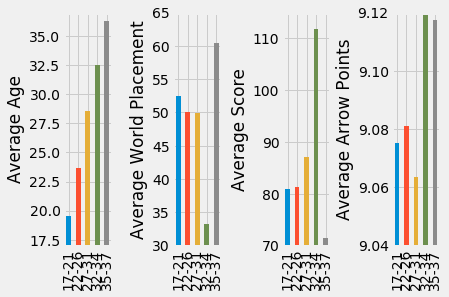

In [21]:
fig, axs = plt.subplots(1,4)
row1 = CombinedMeans.iloc[0]
row2 = CombinedMeans.iloc[1]
row3 = CombinedMeans.iloc[2]
row4 = CombinedMeans.iloc[3]
fig.subplots_adjust(wspace = 1.3)
axs[1].set_ylim(30,65)
axs[1].set_ylabel('Average World Placement')
axs[2].set_ylim(70,115)
axs[2].set_ylabel('Average Score')
axs[0].set_ylim(17,37)
axs[0].set_ylabel('Average Age')
axs[3].set_ylim(9.04,9.12)
axs[3].set_ylabel('Average Arrow Points')

row1.plot.bar(ax = axs[1])
row2.plot.bar(ax = axs[2])
row3.plot.bar(ax = axs[0])
row4.plot.bar(ax = axs[3])